# Exploratory Data Analysis

After extracting the music data from multiple sources, we will now begin exploring the pre-cleaned music dataset. For more information how it was extracted and wrangled, please feel free to explore any of the the *_scripts* folders and read the README.md file. As a refresher, let's re-examine the music files that constitute our dataset.

In [1]:
import os
import pandas as pd

Here are the five genres in my dataset. Let's count how many tracks are there in each of the categories.

In [2]:
cwd = os.getcwd()
categories = [genre for genre in os.listdir('genres/') if genre != '.DS_Store']

count = 0
for genre in categories:
    music_file_directory = cwd + '/genres/' + genre
    music_file_list = os.listdir(music_file_directory)
    
    genre_count = len(music_file_list)
    count += genre_count
    print('{:20s}: {:10d}'.format(genre, genre_count))

print("-"*32)
print('{:20s}: {:10d}'.format('Total Tracks', count))

hip-hop             :        582
soundtrack          :        582
pop                 :        541
rock                :        541
jazz                :        564
--------------------------------
Total Tracks        :       2810


For reference, we will create a pandas dataframe that represents the metadata of the dataset. For now, the dataframe has two columns, the first will be the file location, and the second will be the track's genre.

In [3]:
file_locations = []
genres = []

for genre in categories:
    genre_file_directory = cwd + '/genres/' + genre
    genre_file_list = os.listdir(genre_file_directory)
    
    for file in genre_file_list:
        file_location = genre_file_directory + '/' + file
        file_locations.append(file_location)
        genres.append(genre)
        
music_df = pd.DataFrame(
    {
        'file_location': file_locations,
        'genre': genres
    }
)

music_df = music_df.sample(frac=1)
music_df.to_csv('metadata.csv', index=False)

Since we have those two columns in our table, the question now is how can we extract numerical features from a music file so that we can feed it into a machine learning classification model.

## Mel Spectrogram

After reading through the signal processing research, there is a way to convert a sound wave to its image representation, called the mel-spectrogram. For more information about the mel-spectrogram, as well as how it is generated, feel free to read through this link https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53. For now, let's demonstrate with an example on how we can extract the mel-spectrogram from a music file. Below is a list of useful functions for the Mel Spectrogram analysis.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from librosa import load, power_to_db
from librosa.display import specshow
from librosa.feature import melspectrogram
from random import sample

def display_melspectrogram(file_location):
    y, sampling_rate = load(file_location)
    melspectrogram_db = power_to_db(
        melspectrogram(y=y, sr=sampling_rate), 
        ref=np.max
    )
    
    fig, ax = plt.subplots()
    img = specshow(melspectrogram_db, x_axis='time',y_axis='mel', sr=sampling_rate, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    
    genre, filename = tuple(file_location.split("/")[-2:])
    ax.set(title='Mel-frequency Spectrogram For %s/%s' %(genre, filename))
    
    plt.show()
    
def display_sample_melspectrograms(genre, n_samples = 3):
    file_locations = list(music_df[music_df.genre == genre].file_location)
    samples = sample(file_locations, n_samples)
    
    for file_location in samples:
        display_melspectrogram(file_location)

Here are some mel-spectrogram plots below:

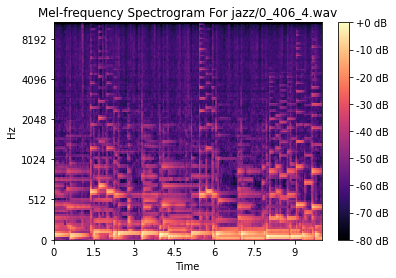

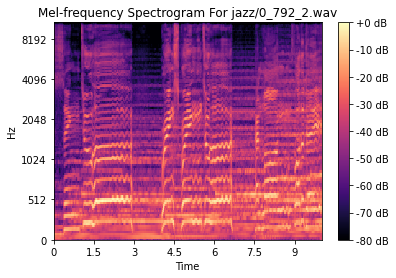

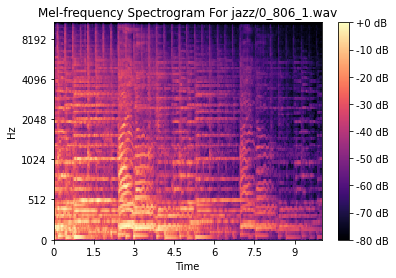

In [6]:
#Randomly sample three Jazz songs from our dataset.
display_sample_melspectrograms('jazz')

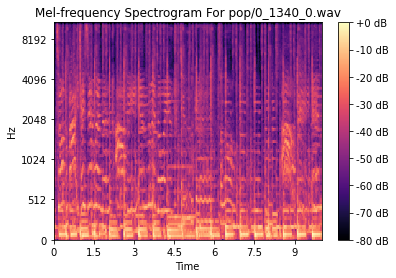

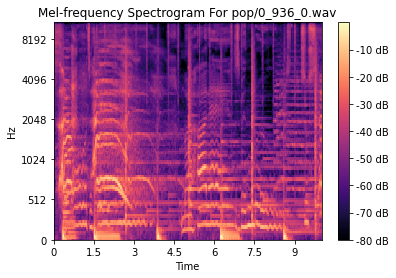

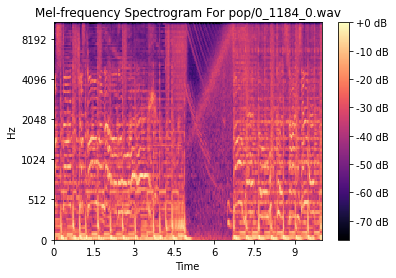

In [7]:
#Randomly sample three Pop songs from our dataset.
display_sample_melspectrograms('pop')

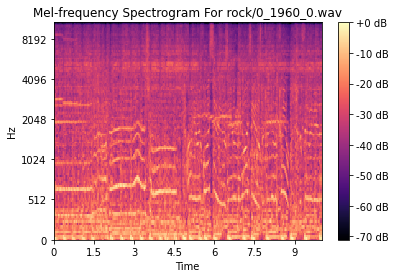

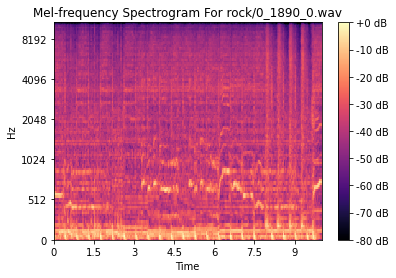

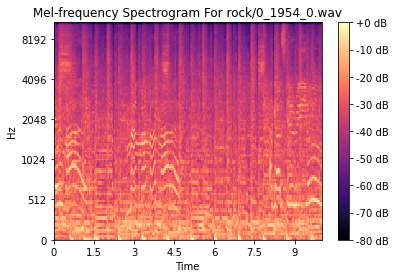

In [8]:
#Randomly sample three Rock songs from our dataset.
display_sample_melspectrograms('rock')

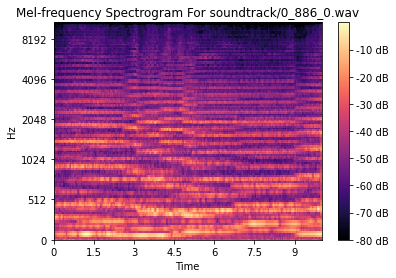

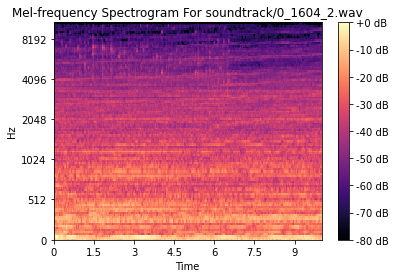

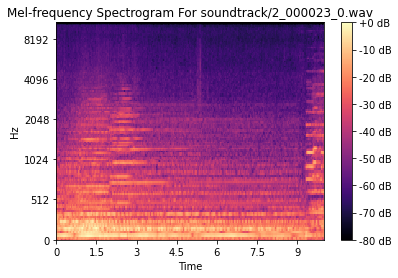

In [9]:
#Randomly sample three soundtrack songs.
display_sample_melspectrograms('soundtrack')

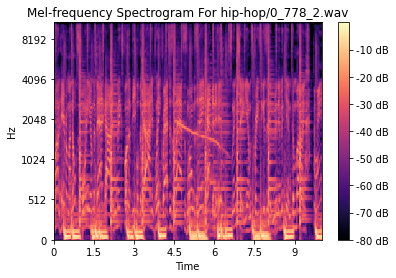

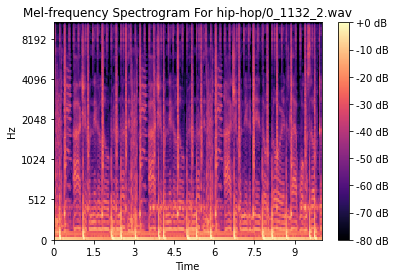

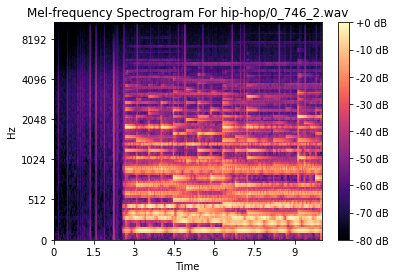

In [10]:
#Randomly sample three hip-hop songs.
display_sample_melspectrograms('hip-hop')

## Other Features

Time Domain Features
 * Central Moments: (mean, standard deviation, skewness and kurtosis of the amplitude of the signal)
 * Zero Crossing Rate
 * Root Mean Square Energy
 * Tempo
 
Frequency Domain Features
 * Mel-Frequency Cepstral Coefficients
 * Chroma Features
 * Spectral Centroid
 * Spectral Band-with

*Coming Soon...*